In [1]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [1]:
import numpy as np

In [2]:
import sys
sys.path.insert(0,'fashion-mnist/utils')

In [3]:
import mnist_reader


In [5]:
X, Y = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from sklearn.metrics import log_loss

# According to question we have to 
# (divide training set into 85:15 train to validation set).

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.15,random_state=10)

# Part A

In [8]:
clf = MLPRegressor(max_iter=450,batch_size=35, hidden_layer_sizes=(256, 32), activation='logistic',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))

0.8037


Text(0.5, 1.0, 'Sigmoid Activation Funtion')

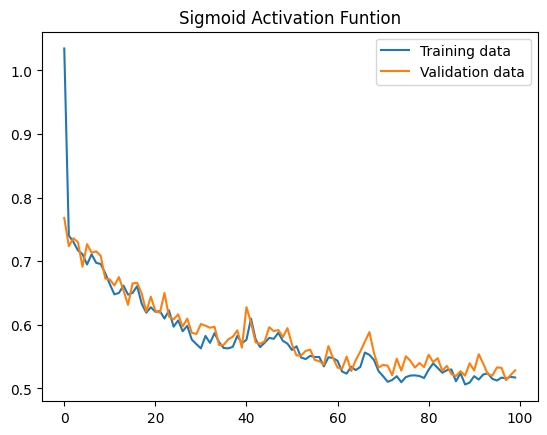

In [9]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])
plt.title('Sigmoid Activation Funtion')

In [9]:
Relu = MLPRegressor(max_iter=450,batch_size=35, hidden_layer_sizes=(256, 32), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    Relu.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = Relu.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = Relu.loss_curve_
print(Relu.score(X_test,y_test))

0.8512


Text(0.5, 1.0, 'Relu Activation Funtion')

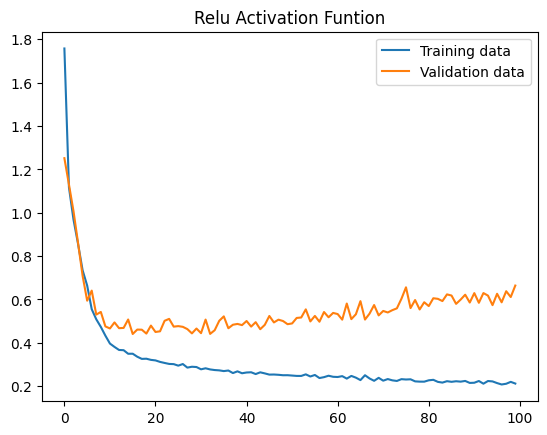

In [11]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])
plt.title('Relu Activation Funtion')

In [10]:
# tanh
clf = MLPRegressor(max_iter=450,batch_size=35, hidden_layer_sizes=(256, 32), activation='tanh',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))

0.7704


Text(0.5, 1.0, 'tanh Activation Funtion')

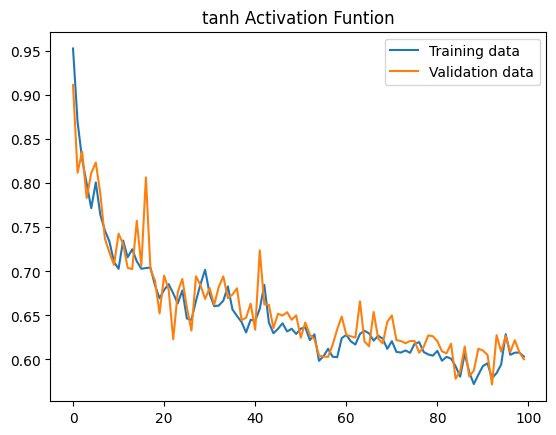

In [10]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title('tanh Activation Funtion')

In [11]:
# Linear
clf = MLPRegressor(max_iter=450,batch_size=35, hidden_layer_sizes=(256, 32), activation='identity',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))

0.7986


Text(0.5, 1.0, 'Linear Activation Funtion')

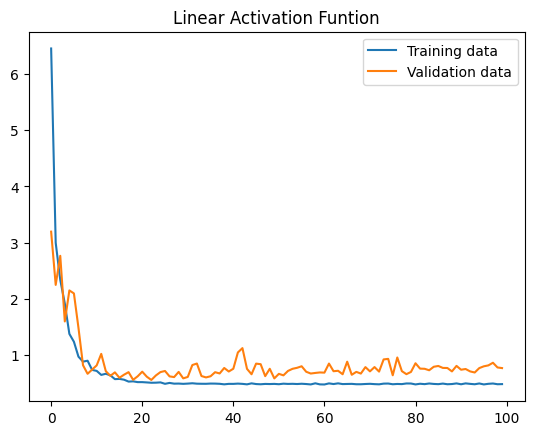

In [12]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title('Linear Activation Funtion')

##### Choosing the right activation function is important and it can be consider as a type of hyperparameter tuning in which , I manually choosen the activation function on the bases of Accuracy and plot(loss v/s epochs and validation loss v/s epochs)
<br>
The accuracy of diffent activation are:<br>
    Simgoid : 0.8037<br>
    Relu : 0.8512 <Br>
    tanh: 0.7704<br>
    linear:0.7986 <br>

<br>
As we can see from the above plots that the diffenrce of training and validation loss for relu is beacuse Relu counters
the problem of vanishing gradients that decreases the learnability of a neural network. Due to
this reason, it performs better than others.
<br>
we can also see that accuracy of Relu best on testing set also
<br>

### clearly the Relu activation function performence is best




# Part B

In [12]:
clf = MLPRegressor(learning_rate_init=0.1,batch_size=35, hidden_layer_sizes=(256, 32), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,35):
    # print(j)    
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

        # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))

train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0.1


Text(0.5, 1.0, 'Relu Activation fn with learnrate: 0.1')

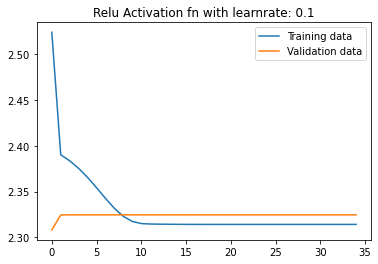

In [13]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with learnrate: 0.1")

0.1


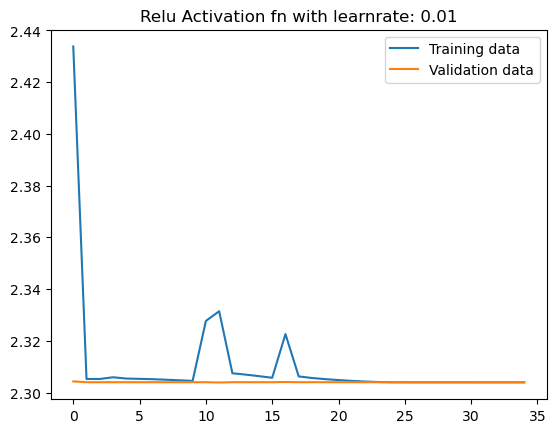

In [13]:
clf = MLPRegressor(learning_rate_init=0.01,batch_size=35, hidden_layer_sizes=(256, 32), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,35):
        
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

        # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))

train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with learnrate: 0.01")
train_loss.clear()
valid_loss.clear()

0.8645


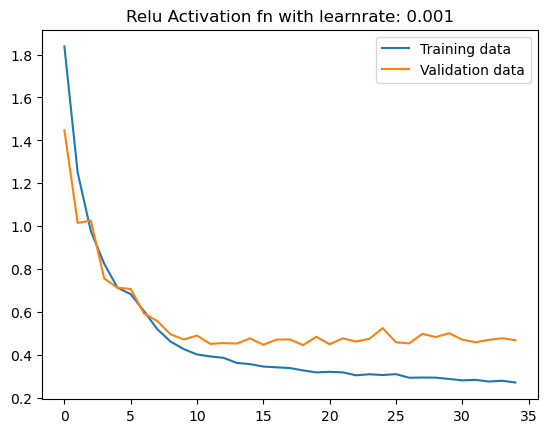

In [14]:
clf = MLPRegressor(learning_rate_init=0.001,batch_size=35, hidden_layer_sizes=(256, 32), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,35):
        
    clf.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

        # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = clf.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))

train_loss = clf.loss_curve_
print(clf.score(X_test,y_test))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with learnrate: 0.001")
train_loss.clear()
valid_loss.clear()

In [2]:
rate_arr = [0.1,0.01,0.001]
for i in rate_arr:
    print("Relu Activation fn with learnrate:", i)

Relu Activation fn with learnrate: 0.1
Relu Activation fn with learnrate: 0.01
Relu Activation fn with learnrate: 0.001


## Result <br>
#### Learning rate refers to how frequently the weights are updated during the training process
As seen in the graphs, lr = 0.001 works the best, and the most likely reason is that the learning rate is excellent for finding a minimum, as opposed to the other two examples. The weights appear to shift violently in the other two situations, thus no minima could be established
<br>
<li>we can also see that accuracy of 0.001 best on testing set which is 0.8645


# Part-c

0.8561


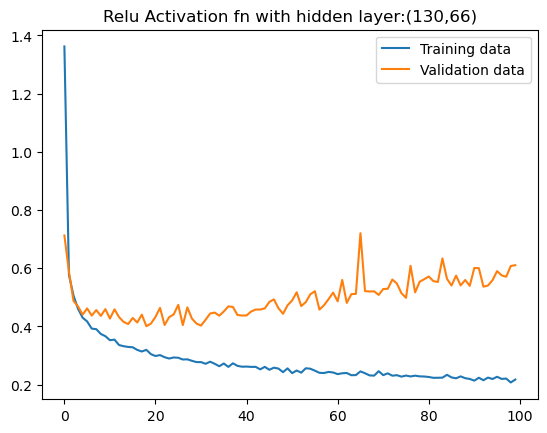

In [15]:
# for hidden layer (130,66)
Relu = MLPRegressor(batch_size=35, hidden_layer_sizes=(130, 66), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    Relu.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])


    y_cal_v = Relu.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = Relu.loss_curve_
print(Relu.score(X_test,y_test))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with hidden layer:(130,66)")
train_loss.clear()
valid_loss.clear()

0.8553


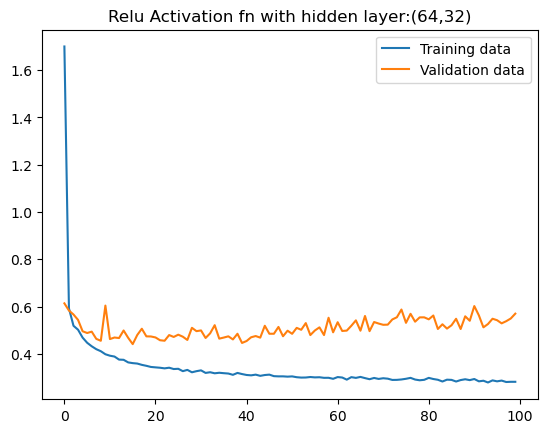

In [16]:
# for hidden layer (64,32)
Relu = MLPRegressor(batch_size=35, hidden_layer_sizes=(64, 32), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    Relu.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = Relu.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = Relu.loss_curve_
print(Relu.score(X_test,y_test))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with hidden layer:(64,32)")
train_loss.clear()
valid_loss.clear()

0.8012


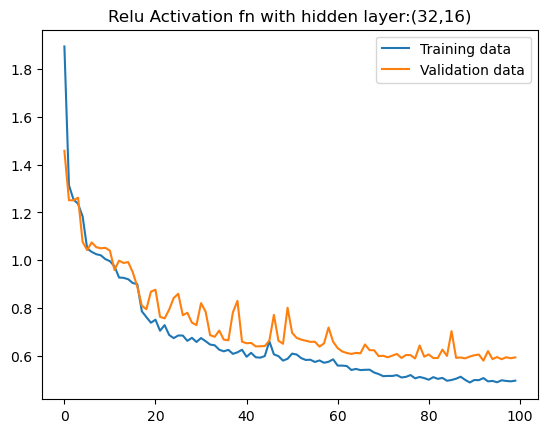

In [17]:
# for hidden layer (32,16)
Relu = MLPRegressor(batch_size=35, hidden_layer_sizes=(32,16), activation='relu',random_state=10,verbose= False)

train_loss = []
valid_loss = []

for j in range(0,100):
    
    Relu.partial_fit(X_train,y_train,[0,1,2,3,4,5,6,7,8,9])

    # y_cal_t = clf.predict_proba(X_train)

    y_cal_v = Relu.predict_proba(X_val)
    valid_loss.append(log_loss(y_val, y_cal_v))   
train_loss = Relu.loss_curve_
print(Relu.score(X_test,y_test))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.legend(['Training data', 'Validation data'])

plt.title("Relu Activation fn with hidden layer:(32,16)")
train_loss.clear()
valid_loss.clear()

### Result

We can see that as the number of neurons in the hidden layers decreases, our training loss and validation loss increase, affecting the model's performance because when a neural network has too few hidden neurons, it lacks the capacity to learn enough. As the number of neurons increases, the NN begins to perform better.

<li> Accuracy when hidden layer size: (130,66) : 0.8561 <br>
</li>
<li>
Accuracy when hidden layer size: (32,16): 0.8012
</li>
<li>
Accuracy when hidden layer size:  (65,32): 0.8553
</li>

#### The [130,36] layers perform the best. The most likely explanation is that the number of neurons required for learning is ideal. More neurons may result in the learning of irrelevant features, while fewer neurons may result in the learning of less relevant ones.

Part-D

In [7]:
clf = MLPRegressor(max_iter=50)

In [9]:
parameter_space = {
    'hidden_layer_sizes': [(256, 32), (128, 16), (64, 28), (32, 4)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'batch_size':[20,35,50,150],
    'max_iter': [25,50]
     
    }

In [12]:
clf_new = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3).fit(X_train, y_train)

/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the 

In [13]:
print('Best parameters found:\n', clf_new.best_params_)

Best parameters found:
 {'activation': 'relu', 'batch_size': 35, 'hidden_layer_sizes': (256, 32), 'max_iter': 50}


In [14]:
clf = MLPRegressor()

In [15]:
parameter_space = {
    'hidden_layer_sizes': [(256, 32), (128, 16)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'batch_size':[20,35,50,150],
    'max_iter': [100,120]
     
    }

In [ ]:
clf_new = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3).fit(X_train, y_train)

In [17]:
print('Best parameters found:\n', clf_new.best_params_)

Best parameters found:
 {'activation': 'relu', 'batch_size': 150, 'hidden_layer_sizes': (256, 32), 'max_iter': 120}


In [ ]:
clf = MLPRegressor()
parameter_space = {
    'hidden_layer_sizes': [(256, 32), (128, 16)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'batch_size':[20,35,50,150],
    'solver':['sgd','adam']
     
    }

clf_new = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3).fit(X_train, y_train)

In [19]:
print('Best parameters found:\n', clf_new.best_params_)

Best parameters found:
 {'activation': 'relu', 'batch_size': 150, 'hidden_layer_sizes': (256, 32), 'solver': 'adam'}


## Result

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters
<br>
<li> Maybe with more epochs we could get a desired result, but since i was low on computation power. I used only 50 to 120 epochs for these experiments which also take 8 hour minimum to run and max 16 hour
    </li>
So we can say that:
<li> max_iter : 120 , Learning rate : 0.001 , Activation Function : Relu, Batch size : 150 , Hidden layer size : (256,32) , solver : adam
<br>

#### All this are best parameter for our case which is matching the above part A ,B,C